In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading training file

mnist = pd.read_csv(r"./dataset/mnist_train.csv")
mnist.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Separate the labels and variables

X = mnist.drop(['label'] , axis = 1)
y = mnist['label']

In [4]:
X.head(2)

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y.value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64

Actual  value :  6


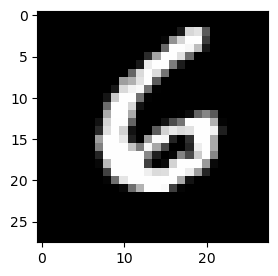

In [6]:
# Display the pixels in an image

plt.figure(figsize = (3,3))

idx = 90
print("Actual  value : ",y.iloc[idx])

grid_data = X.iloc[idx].to_numpy().reshape(28,28)

plt.imshow(X = grid_data ,interpolation= "None" , cmap = "gray" )

plt.show()


### 2D Visualization

In [7]:
# Pick first 15k datapoints

V = X.head(15000)
l = y.head(15000)

In [8]:
V.shape , l.shape

((15000, 784), (15000,))

### DataPreprocessing : column Standardization

In [9]:
from sklearn.preprocessing import StandardScaler

std_data = StandardScaler().fit_transform(V)

In [10]:
std_data[0]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -8.83641471e-03, -1.15102110e-02, -8.16523799e-03, -8.16523799e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -8.16523799e-03, -1.75380447e-02, -2.03868054e-02,
       -2.02746434e-02, -1.94690096e-02, -2.23159415e-02, -2.42878065e-02,
       -2.61581127e-02, -2.86942896e-02, -3.18450784e-02, -3.39222553e-02,
       -3.02824093e-02, -2.69757824e-02, -2.38119257e-02, -2.29805181e-02,
       -2.03676010e-02, -1.29029831e-02, -1.15477032e-02, -8.16523799e-03,
        0.00000000e+00,  

In [11]:
len(std_data[0])

784

### Calculate Covariance matrix

In [12]:
sample_V = std_data.copy()

# Covariance matrix
cov_mat = np.matmul(sample_V.T,sample_V)

In [13]:
print("shape of covariance matrix : \n",cov_mat.shape)

shape of covariance matrix : 
 (784, 784)


### Finding top two eigen values and corresponding eigen vectors for projecting onto 2D space.

In [14]:
from scipy.linalg import eigh

In [15]:
# eigh : returns the eigen values in ascending order 

# this code will generate only top two eigen values (782,783)

eig_val , eig_vec = eigh(cov_mat ,subset_by_index = (782,783) )

In [16]:
eig_val

array([459916.45167454, 616509.42694774])

In [17]:
eig_vec

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [18]:
print("Shape of eigen vectors : ",eig_vec.shape)

Shape of eigen vectors :  (784, 2)


In [19]:
# transpose the eigen vector matric

# eig_vec = eig_vec.T

In [20]:
print("New Shape of eigen vectors : ",eig_vec.shape)

New Shape of eigen vectors :  (784, 2)


### Projecting original sample data onto 2D space

In [21]:
sample_V.shape

(15000, 784)

In [22]:
new_coor_X = np.matmul(sample_V ,eig_vec )
new_coor_X.shape

(15000, 2)

In [23]:
new_coor_X

array([[-4.45704983,  0.96076924],
       [-7.39779508, -8.65815498],
       [ 9.64068954, -2.0828543 ],
       ...,
       [ 1.12527157,  5.75309962],
       [-0.02666788,  7.39420531],
       [ 1.83171889,  5.47713446]])

In [24]:
l.to_numpy()

array([5, 0, 4, ..., 7, 1, 7], dtype=int64)

In [25]:
l_reshape = l.to_numpy().reshape(-1,1)

In [26]:
# Appending transformed coordinates and labels

new_coor = np.hstack((new_coor_X , l_reshape))

In [27]:
new_coor

array([[-4.45704983,  0.96076924,  5.        ],
       [-7.39779508, -8.65815498,  0.        ],
       [ 9.64068954, -2.0828543 ,  4.        ],
       ...,
       [ 1.12527157,  5.75309962,  7.        ],
       [-0.02666788,  7.39420531,  1.        ],
       [ 1.83171889,  5.47713446,  7.        ]])

### converting into DF

In [28]:
mnist_trans = pd.DataFrame(data = new_coor , columns = ["1st_principal" , "2nd_principal" ,"labels"])

In [29]:
mnist_trans.shape

(15000, 3)

In [30]:
mnist_trans.head(5)

,1st_principal,2nd_principal,labels
0,-4.457050,0.960769,5.0
1,-7.397795,-8.658155,0.0
2,9.640690,-2.082854,4.0
3,-3.356074,7.187465,1.0
4,2.979880,4.933889,9.0


In [31]:
mnist_trans['labels'] = pd.to_numeric(mnist_trans['labels'] ,downcast = "integer" )

In [32]:
mnist_trans['labels'].unique()

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8], dtype=int8)

## Plotting

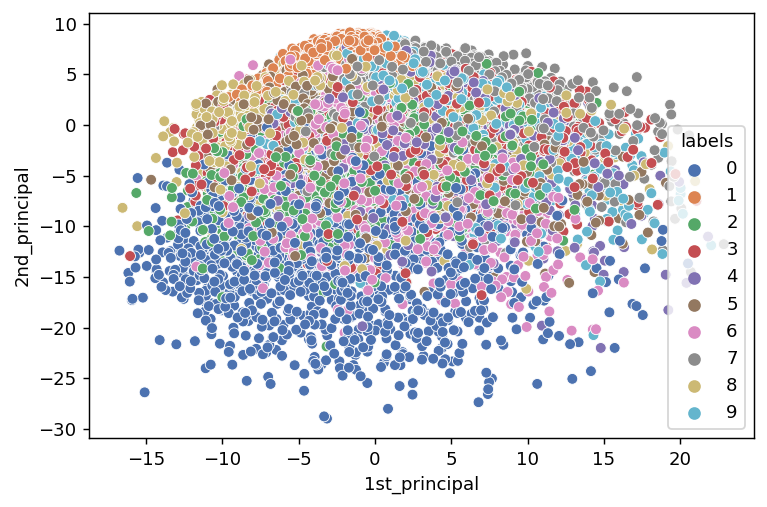

In [33]:
fig = plt.figure(figsize = (6,4) , dpi = 130)
sns.scatterplot(data = mnist_trans , x = "1st_principal" , y = "2nd_principal" , hue = "labels",
                palette  = 'deep')
fig.tight_layout()
plt.show()

# PCA using scikit learn

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA()

In [36]:
# Required number of components

pca.n_components = 2

In [37]:
pca_trans= pca.fit_transform(sample_V)

In [44]:
# 2D array
pca_trans

array([[-0.96069785, -4.45677354],
       [ 8.65811862, -7.3980184 ],
       [ 2.08290721,  9.64123083],
       ...,
       [-5.75314998,  1.12499341],
       [-7.39419721, -0.02657607],
       [-5.47717605,  1.83150528]])

In [38]:
print("transformed shape of X : ",pca_trans.shape)

transformed shape of X :  (15000, 2)


### Converting to DF

In [39]:
pca_data = np.hstack((pca_trans ,l_reshape ))

In [40]:
mnist_trans2 = pd.DataFrame(data = pca_data , columns = ["1st_principal" , "2nd_principal" ,"labels"])

In [41]:
mnist_trans2.head(2)

,1st_principal,2nd_principal,labels
0,-0.960698,-4.456774,5.0
1,8.658119,-7.398018,0.0


In [42]:
mnist_trans2['labels'] = pd.to_numeric(mnist_trans2['labels'] , downcast= "integer")

## Plotting

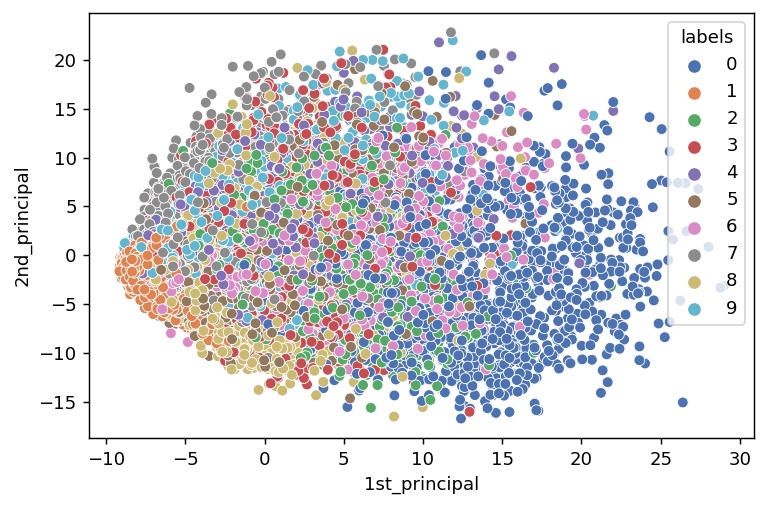

In [43]:
fig = plt.figure(figsize = (6,4) , dpi = 130)

sns.scatterplot(data = mnist_trans2 , x = "1st_principal" , y = "2nd_principal" , hue = "labels",
                palette  = 'deep')

fig.tight_layout()

plt.show()